In [3]:
%matplotlib inline

In [4]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
pd.set_option('display.max_columns', 50) # print all rows


import os
os.chdir('/Users/evanbiederstedt/Downloads/RRBS_data_files')

import statsmodels.api as sm

In [5]:
"""
Normal_B_regions.csv
pcell_regions.csv
trito_regions.csv
mcell_regions.csv
CD19cell_regions.csv
cw154_regions.csv
"""

'\nNormal_B_regions.csv\npcell_regions.csv\ntrito_regions.csv\nmcell_regions.csv\nCD19cell_regions.csv\ncw154_regions.csv\n'

In [6]:
normalB = pd.read_csv("Correct_Normal_B_regions.csv")
mcell = pd.read_csv("Correct_mcell_regions.csv")
pcell = pd.read_csv("Correct_pcell_regions.csv")
cd19cell = pd.read_csv("Correct_CD19cell_regions.csv")
trito = pd.read_csv("Correct_trito_regions.csv")
cw154 = pd.read_csv("Correct_cw154_regions.csv")

In [7]:
print(normalB.shape)
print(mcell.shape)
print(pcell.shape)
print(cd19cell.shape)
print(trito.shape)
print(cw154.shape)

(113, 40)
(75, 40)
(70, 40)
(84, 40)
(42, 40)
(62, 40)


In [8]:
normal_all = pd.concat([normalB, mcell, pcell, cd19cell])

cll_all = pd.concat([trito, cw154])

In [9]:
print(normal_all.shape)
print(cll_all.shape)

(342, 40)
(104, 40)


In [ ]:
#
# 
#

In [10]:
normalB.columns

Index(['index', 'filename', 'methylation_tssDistance',
       'methylation_genesDistance', 'methylation_exonsDistance',
       'methylation_intronsDistance', 'methylation_promoterDistance',
       'methylation_cgiDistance', 'methylation_ctcfDistance',
       'methylation_ctcfUpDistance', 'methylation_ctcfDownDistance',
       'methylation_geneDistalRegulatoryModulesDistance',
       'methylation_vistaEnhancersDistance', 'methylation_3PrimeUTRDistance',
       'methylation_5PrimeUTRDistance', 'methylation_firstExonDistance',
       'methylation_geneDistalRegulatoryModulesK562Distance',
       'methylation_hypoInHues64Distance', 'methylation_intergenic',
       'methylation_shore', 'methylation_shelf', 'PDR_tssDistance',
       'PDR_genesDistance', 'PDR_exonsDistance', 'PDR_intronsDistance',
       'PDR_promoterDistance', 'PDR_cgiDistance', 'PDR_ctcfDistance',
       'PDR_ctcfUpDistance', 'PDR_ctcfDownDistance',
       'PDR_geneDistalRegulatoryModulesDistance', 'PDR_vistaEnhancersDistanc

In [58]:
normalB_meth = normalB[['methylation_genesDistance', 'methylation_exonsDistance',
       'methylation_intronsDistance', 'methylation_promoterDistance',
       'methylation_cgiDistance', 'methylation_ctcfDistance', 'methylation_ctcfDownDistance',
       'methylation_geneDistalRegulatoryModulesDistance',
       'methylation_vistaEnhancersDistance', 'methylation_3PrimeUTRDistance',
       'methylation_5PrimeUTRDistance', 'methylation_firstExonDistance',
       'methylation_geneDistalRegulatoryModulesK562Distance',
       'methylation_hypoInHues64Distance', 'methylation_intergenic',
       'methylation_shore', 'methylation_shelf']]

pcell_meth = pcell[['methylation_genesDistance', 'methylation_exonsDistance',
       'methylation_intronsDistance', 'methylation_promoterDistance',
       'methylation_cgiDistance', 'methylation_ctcfDistance', 'methylation_ctcfDownDistance',
       'methylation_geneDistalRegulatoryModulesDistance',
       'methylation_vistaEnhancersDistance', 'methylation_3PrimeUTRDistance',
       'methylation_5PrimeUTRDistance', 'methylation_firstExonDistance',
       'methylation_geneDistalRegulatoryModulesK562Distance',
       'methylation_hypoInHues64Distance', 'methylation_intergenic',
       'methylation_shore', 'methylation_shelf']]


mcell_meth = mcell[['methylation_genesDistance', 'methylation_exonsDistance',
       'methylation_intronsDistance', 'methylation_promoterDistance',
       'methylation_cgiDistance', 'methylation_ctcfDistance', 'methylation_ctcfDownDistance',
       'methylation_geneDistalRegulatoryModulesDistance',
       'methylation_vistaEnhancersDistance', 'methylation_3PrimeUTRDistance',
       'methylation_5PrimeUTRDistance', 'methylation_firstExonDistance',
       'methylation_geneDistalRegulatoryModulesK562Distance',
       'methylation_hypoInHues64Distance', 'methylation_intergenic',
       'methylation_shore', 'methylation_shelf']]


cd19cell_meth = cd19cell[['methylation_genesDistance', 'methylation_exonsDistance',
       'methylation_intronsDistance', 'methylation_promoterDistance',
       'methylation_cgiDistance', 'methylation_ctcfDistance', 'methylation_ctcfDownDistance',
       'methylation_geneDistalRegulatoryModulesDistance',
       'methylation_vistaEnhancersDistance', 'methylation_3PrimeUTRDistance',
       'methylation_5PrimeUTRDistance', 'methylation_firstExonDistance',
       'methylation_geneDistalRegulatoryModulesK562Distance',
       'methylation_hypoInHues64Distance', 'methylation_intergenic',
       'methylation_shore', 'methylation_shelf']]


trito_meth = trito[['methylation_genesDistance', 'methylation_exonsDistance',
       'methylation_intronsDistance', 'methylation_promoterDistance',
       'methylation_cgiDistance', 'methylation_ctcfDistance', 'methylation_ctcfDownDistance',
       'methylation_geneDistalRegulatoryModulesDistance',
       'methylation_vistaEnhancersDistance', 'methylation_3PrimeUTRDistance',
       'methylation_5PrimeUTRDistance', 'methylation_firstExonDistance',
       'methylation_geneDistalRegulatoryModulesK562Distance',
       'methylation_hypoInHues64Distance', 'methylation_intergenic',
       'methylation_shore', 'methylation_shelf']]

cw154_meth = cw154[['methylation_genesDistance', 'methylation_exonsDistance',
       'methylation_intronsDistance', 'methylation_promoterDistance',
       'methylation_cgiDistance', 'methylation_ctcfDistance', 'methylation_ctcfDownDistance',
       'methylation_geneDistalRegulatoryModulesDistance',
       'methylation_vistaEnhancersDistance', 'methylation_3PrimeUTRDistance',
       'methylation_5PrimeUTRDistance', 'methylation_firstExonDistance',
       'methylation_geneDistalRegulatoryModulesK562Distance',
       'methylation_hypoInHues64Distance', 'methylation_intergenic',
       'methylation_shore', 'methylation_shelf']]


normal_all_meth = normal_all[['methylation_genesDistance', 'methylation_exonsDistance',
       'methylation_intronsDistance', 'methylation_promoterDistance',
       'methylation_cgiDistance', 'methylation_ctcfDistance', 'methylation_ctcfDownDistance',
       'methylation_geneDistalRegulatoryModulesDistance',
       'methylation_vistaEnhancersDistance', 'methylation_3PrimeUTRDistance',
       'methylation_5PrimeUTRDistance', 'methylation_firstExonDistance',
       'methylation_geneDistalRegulatoryModulesK562Distance',
       'methylation_hypoInHues64Distance', 'methylation_intergenic',
       'methylation_shore', 'methylation_shelf']]


cll_all_meth = cll_all[['methylation_genesDistance', 'methylation_exonsDistance',
       'methylation_intronsDistance', 'methylation_promoterDistance',
       'methylation_cgiDistance', 'methylation_ctcfDistance', 'methylation_ctcfDownDistance',
       'methylation_geneDistalRegulatoryModulesDistance',
       'methylation_vistaEnhancersDistance', 'methylation_3PrimeUTRDistance',
       'methylation_5PrimeUTRDistance', 'methylation_firstExonDistance',
       'methylation_geneDistalRegulatoryModulesK562Distance',
       'methylation_hypoInHues64Distance', 'methylation_intergenic',
       'methylation_shore', 'methylation_shelf']]



In [59]:
normalB_PDR = normalB[['PDR_genesDistance', 'PDR_exonsDistance', 'PDR_intronsDistance',
       'PDR_promoterDistance', 'PDR_cgiDistance', 'PDR_ctcfDistance', 'PDR_ctcfDownDistance',
       'PDR_geneDistalRegulatoryModulesDistance', 'PDR_vistaEnhancersDistance',
       'PDR_3PrimeUTRDistance', 'PDR_5PrimeUTRDistance',
       'PDR_firstExonDistance', 'PDR_geneDistalRegulatoryModulesK562Distance',
       'PDR_hypoInHues64Distance', 'PDR_intergenic', 'PDR_shore', 'PDR_shelf']]

pcell_PDR = pcell[['PDR_genesDistance', 'PDR_exonsDistance', 'PDR_intronsDistance',
       'PDR_promoterDistance', 'PDR_cgiDistance', 'PDR_ctcfDistance', 'PDR_ctcfDownDistance',
       'PDR_geneDistalRegulatoryModulesDistance', 'PDR_vistaEnhancersDistance',
       'PDR_3PrimeUTRDistance', 'PDR_5PrimeUTRDistance',
       'PDR_firstExonDistance', 'PDR_geneDistalRegulatoryModulesK562Distance',
       'PDR_hypoInHues64Distance', 'PDR_intergenic', 'PDR_shore', 'PDR_shelf']]

mcell_PDR = mcell[['PDR_genesDistance', 'PDR_exonsDistance', 'PDR_intronsDistance',
       'PDR_promoterDistance', 'PDR_cgiDistance', 'PDR_ctcfDistance', 'PDR_ctcfDownDistance',
       'PDR_geneDistalRegulatoryModulesDistance', 'PDR_vistaEnhancersDistance',
       'PDR_3PrimeUTRDistance', 'PDR_5PrimeUTRDistance',
       'PDR_firstExonDistance', 'PDR_geneDistalRegulatoryModulesK562Distance',
       'PDR_hypoInHues64Distance', 'PDR_intergenic', 'PDR_shore', 'PDR_shelf']]

cd19cell_PDR = cd19cell[['PDR_genesDistance', 'PDR_exonsDistance', 'PDR_intronsDistance',
       'PDR_promoterDistance', 'PDR_cgiDistance', 'PDR_ctcfDistance', 'PDR_ctcfDownDistance',
       'PDR_geneDistalRegulatoryModulesDistance', 'PDR_vistaEnhancersDistance',
       'PDR_3PrimeUTRDistance', 'PDR_5PrimeUTRDistance',
       'PDR_firstExonDistance', 'PDR_geneDistalRegulatoryModulesK562Distance',
       'PDR_hypoInHues64Distance', 'PDR_intergenic', 'PDR_shore', 'PDR_shelf']]

trito_PDR = trito[['PDR_genesDistance', 'PDR_exonsDistance', 'PDR_intronsDistance',
       'PDR_promoterDistance', 'PDR_cgiDistance', 'PDR_ctcfDistance', 'PDR_ctcfDownDistance',
       'PDR_geneDistalRegulatoryModulesDistance', 'PDR_vistaEnhancersDistance',
       'PDR_3PrimeUTRDistance', 'PDR_5PrimeUTRDistance',
       'PDR_firstExonDistance', 'PDR_geneDistalRegulatoryModulesK562Distance',
       'PDR_hypoInHues64Distance', 'PDR_intergenic', 'PDR_shore', 'PDR_shelf']]

cw154_PDR = cw154[['PDR_genesDistance', 'PDR_exonsDistance', 'PDR_intronsDistance',
       'PDR_promoterDistance', 'PDR_cgiDistance', 'PDR_ctcfDistance', 'PDR_ctcfDownDistance',
       'PDR_geneDistalRegulatoryModulesDistance', 'PDR_vistaEnhancersDistance',
       'PDR_3PrimeUTRDistance', 'PDR_5PrimeUTRDistance',
       'PDR_firstExonDistance', 'PDR_geneDistalRegulatoryModulesK562Distance',
       'PDR_hypoInHues64Distance', 'PDR_intergenic', 'PDR_shore', 'PDR_shelf']]


normal_all_PDR = normal_all[['PDR_genesDistance', 'PDR_exonsDistance', 'PDR_intronsDistance',
       'PDR_promoterDistance', 'PDR_cgiDistance', 'PDR_ctcfDistance', 'PDR_ctcfDownDistance',
       'PDR_geneDistalRegulatoryModulesDistance', 'PDR_vistaEnhancersDistance',
       'PDR_3PrimeUTRDistance', 'PDR_5PrimeUTRDistance',
       'PDR_firstExonDistance', 'PDR_geneDistalRegulatoryModulesK562Distance',
       'PDR_hypoInHues64Distance', 'PDR_intergenic', 'PDR_shore', 'PDR_shelf']]



cll_all_PDR = cll_all[['PDR_genesDistance', 'PDR_exonsDistance', 'PDR_intronsDistance',
       'PDR_promoterDistance', 'PDR_cgiDistance', 'PDR_ctcfDistance', 'PDR_ctcfDownDistance',
       'PDR_geneDistalRegulatoryModulesDistance', 'PDR_vistaEnhancersDistance',
       'PDR_3PrimeUTRDistance', 'PDR_5PrimeUTRDistance',
       'PDR_firstExonDistance', 'PDR_geneDistalRegulatoryModulesK562Distance',
       'PDR_hypoInHues64Distance', 'PDR_intergenic', 'PDR_shore', 'PDR_shelf']]







/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


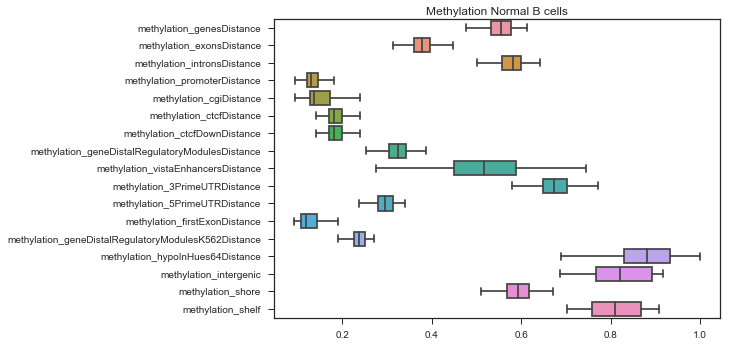

In [45]:
sns.boxplot(normalB_meth, orient="h", showfliers=False)
plt.title("Methylation Normal B cells")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


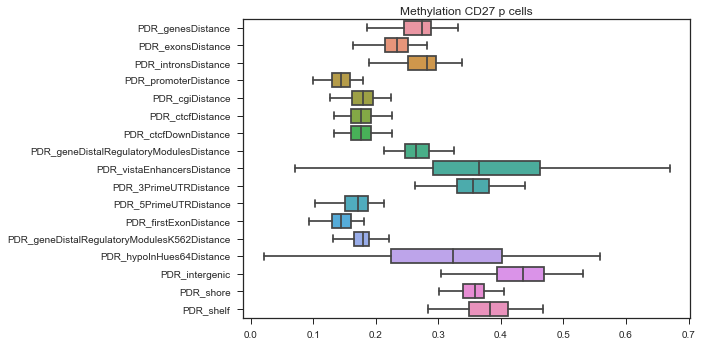

In [46]:
sns.boxplot(pcell_PDR, orient="h", showfliers=False)
plt.title("Methylation CD27 p cells")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


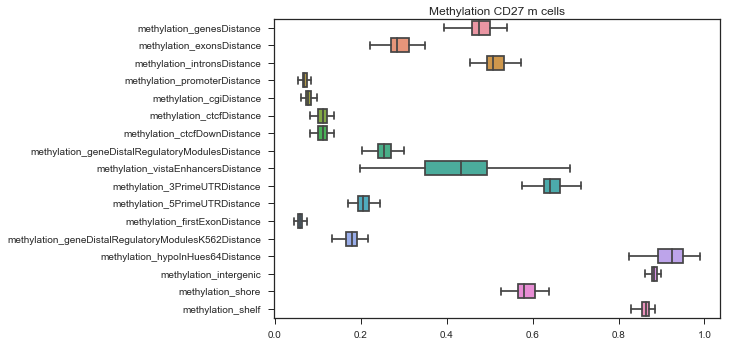

In [47]:
sns.boxplot(mcell_meth, orient="h", showfliers=False)
plt.title("Methylation CD27 m cells")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


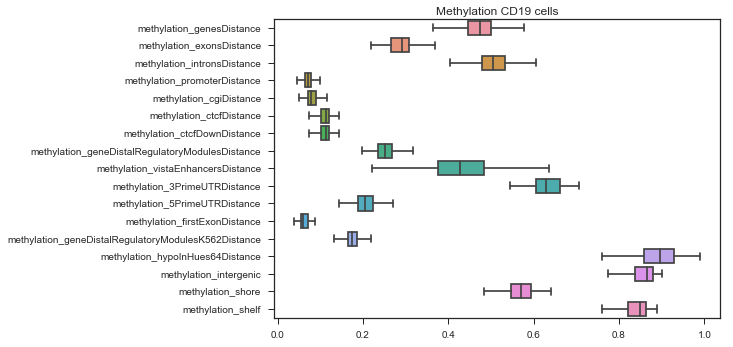

In [48]:
sns.boxplot(cd19cell_meth, orient="h", showfliers=False)
plt.title("Methylation CD19 cells")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


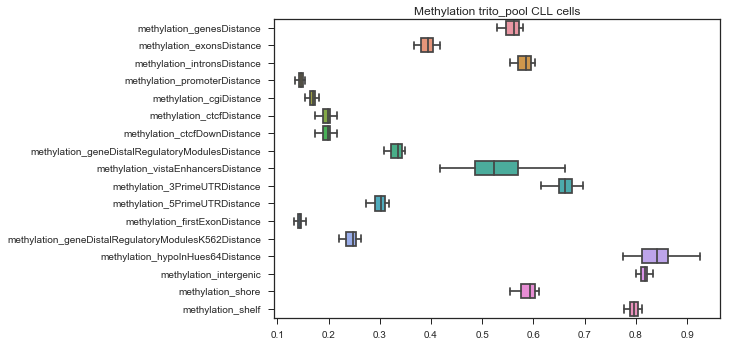

In [49]:
sns.boxplot(trito_meth, orient="h", showfliers=False)
plt.title("Methylation trito_pool CLL cells")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


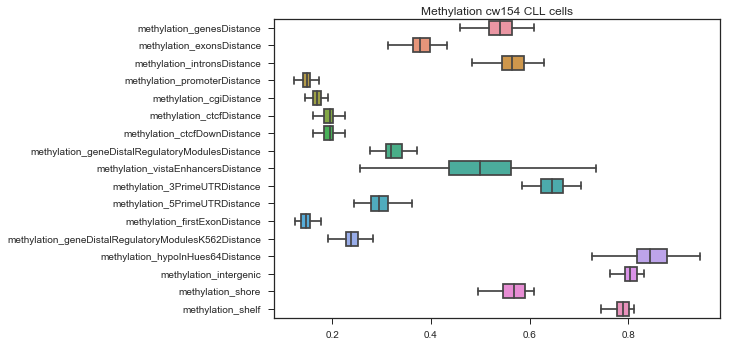

In [50]:
sns.boxplot(cw154_meth, orient="h", showfliers=False)
plt.title("Methylation cw154 CLL cells")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


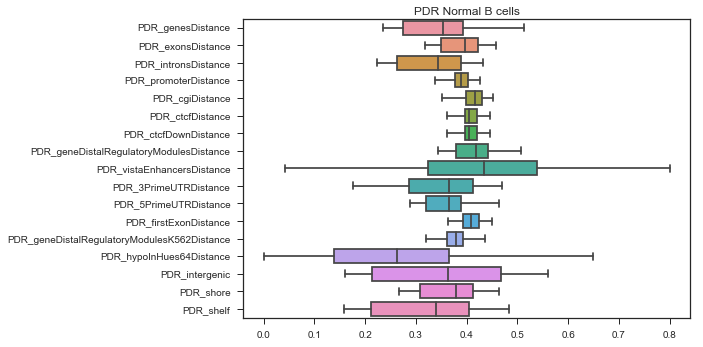

In [51]:
sns.boxplot(normalB_PDR, orient="h", showfliers=False)
plt.title("PDR Normal B cells")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


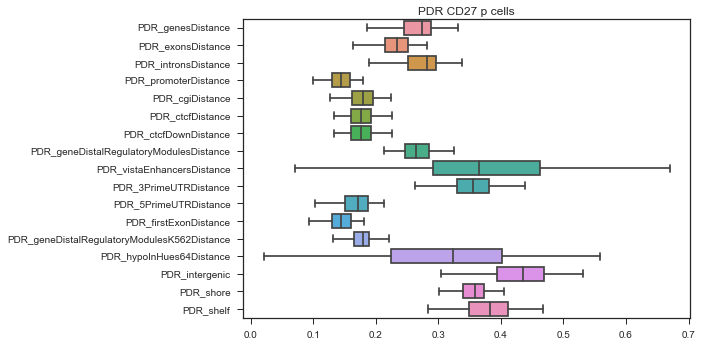

In [52]:
sns.boxplot(pcell_PDR, orient="h", showfliers=False)
plt.title("PDR CD27 p cells")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


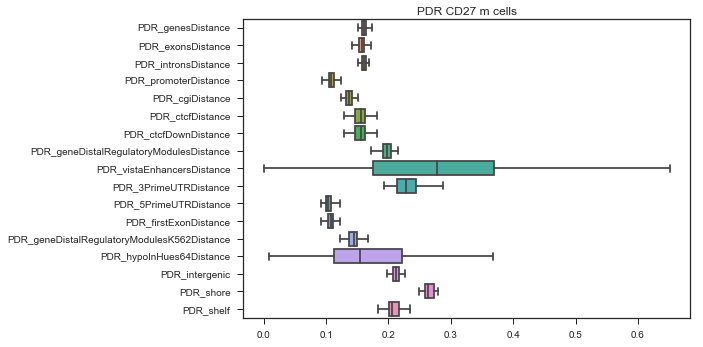

In [53]:
sns.boxplot(mcell_PDR, orient="h", showfliers=False)
plt.title("PDR CD27 m cells")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


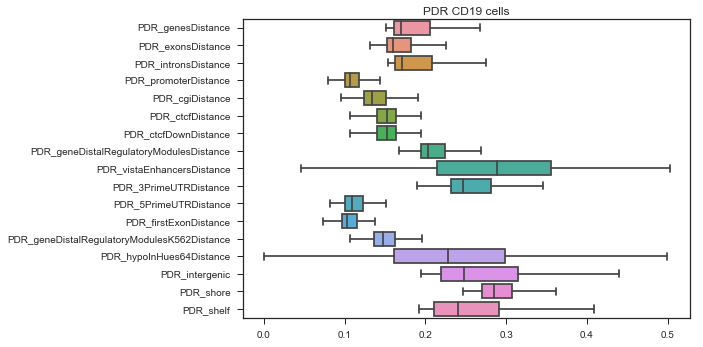

In [54]:
sns.boxplot(cd19cell_PDR, orient="h", showfliers=False)
plt.title("PDR CD19 cells")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


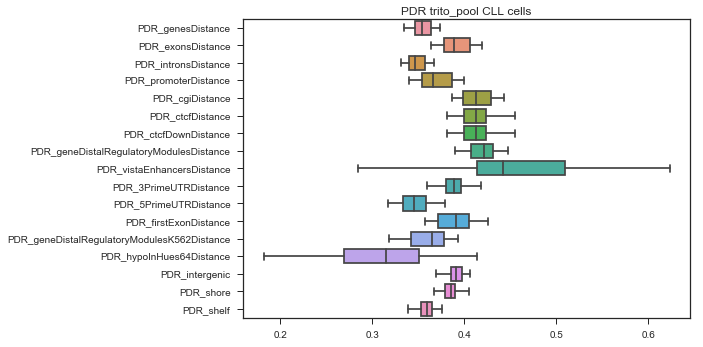

In [55]:
sns.boxplot(trito_PDR, orient="h", showfliers=False)
plt.title("PDR trito_pool CLL cells")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


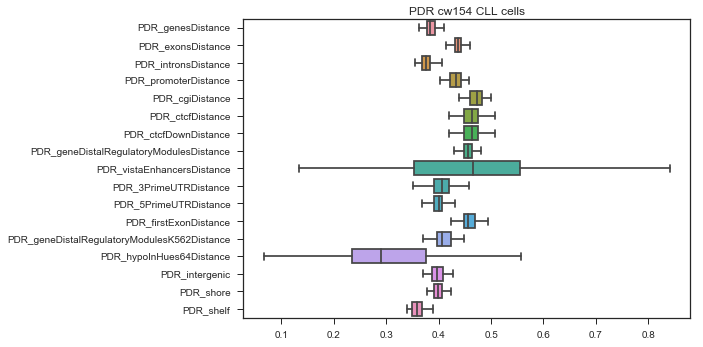

In [56]:
sns.boxplot(cw154_PDR, orient="h", showfliers=False)
plt.title("PDR cw154 CLL cells")

In [61]:
pdr_normal_strip = pd.melt(normal_all_PDR, var_name='genome_region', value_name='PDR')
pdr_cll_strip = pd.melt(cll_all_PDR, var_name='genome_region', value_name='PDR')

In [62]:
meth_normal_strip = pd.melt(normal_all_meth, var_name='genome_region', value_name='methyl')
meth_cll_strip = pd.melt(cll_all_meth, var_name='genome_region', value_name='methyl')

In [63]:
pdr_normal_strip["category"] = str("Normal")
pdr_cll_strip["category"] = str("CLL")

meth_normal_strip["category"] = str("Normal")
meth_cll_strip["category"] = str("CLL")

In [64]:
total_pdr_pairs = pd.concat([pdr_normal_strip, pdr_cll_strip])

total_meth_pairs = pd.concat([meth_normal_strip, meth_cll_strip])

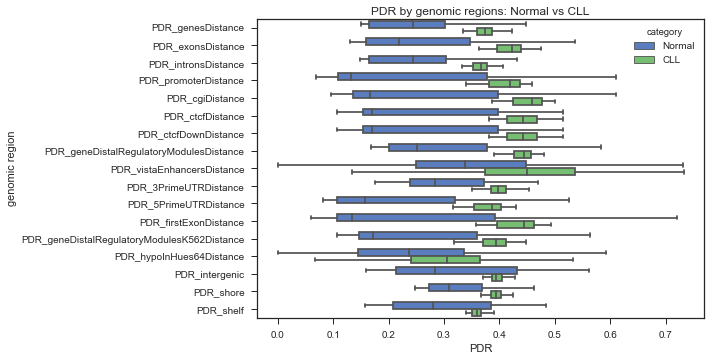

In [68]:
sns.boxplot(y=total_pdr_pairs.genome_region, x=total_pdr_pairs.PDR, hue=total_pdr_pairs.category, showfliers=False)
plt.title("PDR by genomic regions: Normal vs CLL")
plt.ylabel("genomic region")

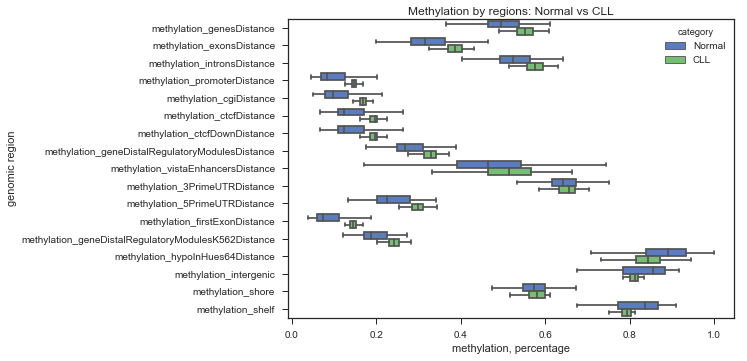

In [70]:
sns.boxplot(y=total_meth_pairs.genome_region, x=total_meth_pairs.methyl, hue=total_meth_pairs.category, showfliers=False)
plt.title("Methylation by regions: Normal vs CLL")
plt.ylabel("genomic region")
plt.xlabel("methylation, percentage")